In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("OSMI 2019 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv")

In [7]:
selected_columns = df[['Do you *currently* have a mental health disorder?', 'Have you ever been *diagnosed* with a mental health disorder?', '*If so, what disorder(s) were you diagnosed with?*']]
print(selected_columns)

    Do you *currently* have a mental health disorder?  \
0                                          Don't Know   
1                                            Possibly   
2                                                  No   
3                                                  No   
4                                                  No   
..                                                ...   
347                                          Possibly   
348                                                No   
349                                                No   
350                                          Possibly   
351                                               Yes   

    Have you ever been *diagnosed* with a mental health disorder?  \
0                                                  NaN              
1                                                  NaN              
2                                                  NaN              
3                                      

In [8]:
tally_current_disorder = selected_columns['Do you *currently* have a mental health disorder?'].value_counts()
tally_diagnosed_disorder = selected_columns['Have you ever been *diagnosed* with a mental health disorder?'].value_counts()
tally_nameof_disorder = selected_columns['*If so, what disorder(s) were you diagnosed with?*'].value_counts()

print("Tally of current mental health disorder responses:")
print(tally_current_disorder)

print("\nTally of diagnosed mental health disorder responses:")
print(tally_diagnosed_disorder)

print("\nNames of disorders diagnosed:")
print(tally_nameof_disorder)    


Tally of current mental health disorder responses:
Do you *currently* have a mental health disorder?
Yes           147
No            104
Possibly       75
Don't Know     26
Name: count, dtype: int64

Tally of diagnosed mental health disorder responses:
Have you ever been *diagnosed* with a mental health disorder?
Yes    144
No       3
Name: count, dtype: int64

Names of disorders diagnosed:
*If so, what disorder(s) were you diagnosed with?*
Mood Disorder (Depression, Bipolar Disorder, etc)                                                                                                                                                                                                                                                                                                                                                                 19
Mood Disorder (Depression, Bipolar Disorder, etc), Anxiety Disorder (Generalized, Social, Phobia, etc)                                                

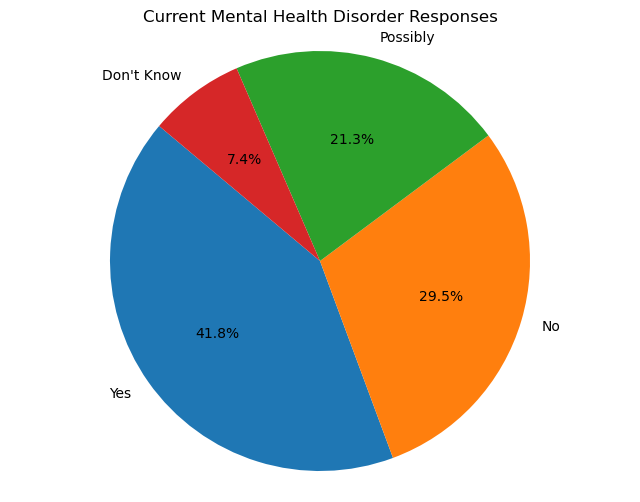

In [9]:
plt.figure(figsize=(8, 6))
plt.pie(tally_current_disorder, labels=tally_current_disorder.index, autopct='%1.1f%%', startangle=140)
plt.title('Current Mental Health Disorder Responses')
plt.axis('equal')
plt.show()


Mood Disorder (Depression                   101
Bipolar Disorder                            101
Anxiety Disorder (Generalized                98
Social                                       98
Phobia                                       98
Attention Deficit Hyperactivity Disorder     31
Post-traumatic Stress Disorder               23
Seasonal Affective Disorder                   1
Dissociative Disorder                         6
Stress Response Syndromes                     8
Seasonal Affect Disorder                      1
Substance Use Disorder                        5
Obsessive-Compulsive Disorder                13
Eating Disorder (Anorexia                    14
Bulimia                                      14
Personality Disorder (Borderline              5
Antisocial                                    5
Paranoid                                      5
Major Depressive Disorder                     1
Psychotic Disorder (Schizophrenia             6
Schizoaffective                         

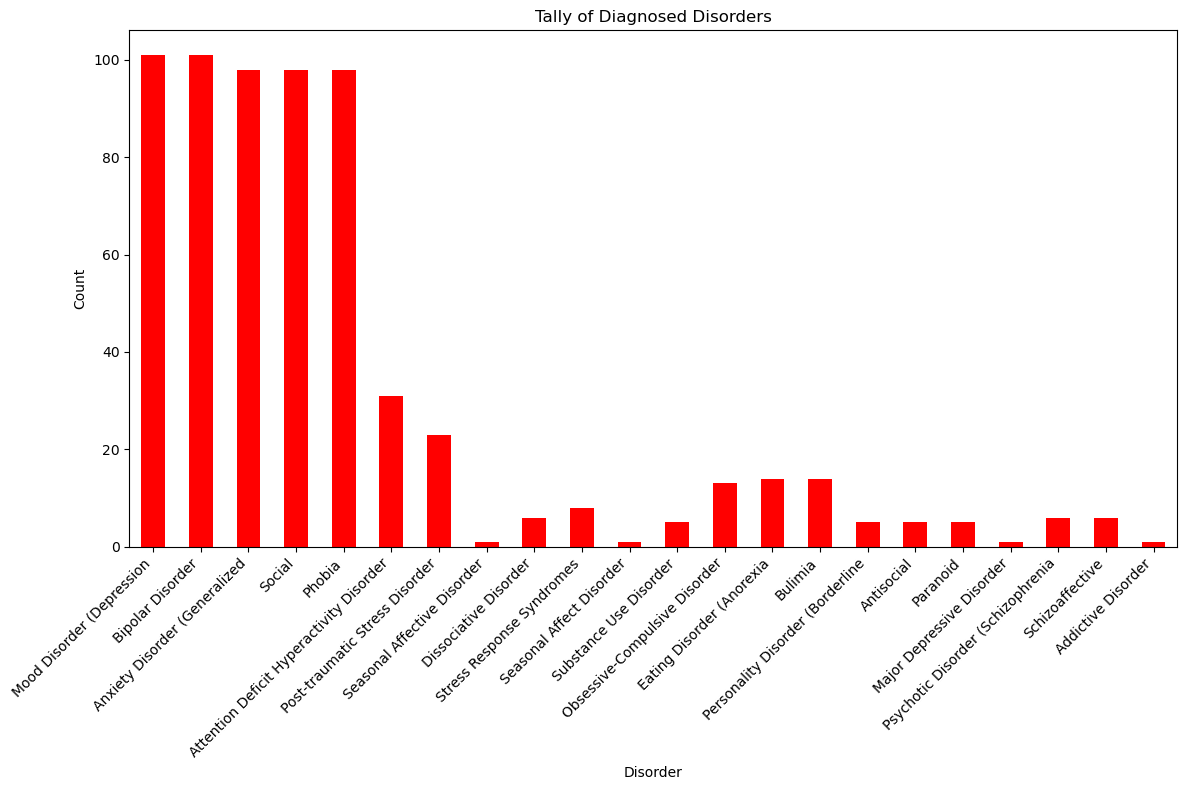

In [10]:
unique_disorders = {}

for disorder_list in df['*If so, what disorder(s) were you diagnosed with?*']:
    if isinstance(disorder_list, str):  
        for disorder in disorder_list.split(', '):
            disorder = disorder.strip()  
            
            if "etc)" not in disorder:
                if disorder in unique_disorders:
                    unique_disorders[disorder] += 1
                else:
                    unique_disorders[disorder] = 1


tally_nameof_disorder = pd.Series(unique_disorders)

print(tally_nameof_disorder)

plt.figure(figsize=(12, 8))  
tally_nameof_disorder.plot(kind='bar', color='red')
plt.title('Tally of Diagnosed Disorders')
plt.xlabel('Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()